# Multvariate lineare Regression

In [2]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import matplotlib.pyplot as plt

**1) Erstellen Sie zuerst zum Testen Ihrer Lösung künstliche Datenwerte für zwei Merkmale (Features)**

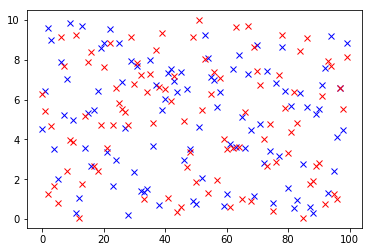

In [3]:
# Anzahl der Features
m = 2
# Anzahl der Beobachtungen
n = 100

# Erzeugen der Beobachtungen
X = np.random.uniform(0,10,(m, n))
#print(X)

# Erzeugen der Thetas
start = 1
end = 3
thetas = np.linspace(start, end, num=m+1)

# Visualisierung
mp.plot(X[1], "xb")
mp.plot(X[0], "xr")

**2) Implementieren Sie die Hypothese - lineares Modell als Python Funktion**

In [8]:
def linear_hypothesis(thetas):
    thetas1 = thetas[1:]
    return lambda X: thetas[0] + np.dot(X.transpose(),thetas1)

**3)
a) Nutzen Sie die Funktion linear_hypothesis(theta) zum Generieren künstlicher y-Werte (Zielwerte) für Ihre Merkmalsvektoren (Zeilen von X). Addieren Sie zusätzich ein gaussches Rauschen auf die einzelnen y-Werte.**

**b) Stellen Sie die X1-X2-Y Werte in einem 3D Plot dar. siehe: http://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html**

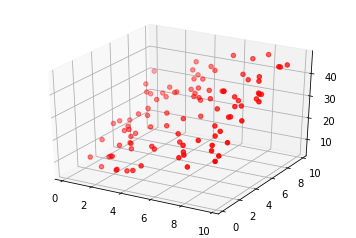

In [9]:
# Erzeugen von Y-Werten
h = linear_hypothesis(thetas)
rauschen = np.random.randn((n)) * 1.4
Y = np.add(h(X), rauschen)
# 3D-Plot
fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(X[0], X[1], Y, c="r")

**3c) Implementieren Sie das Feature Scaling um neue x' Werte zu berechnen**

In [10]:
# Formatiert einen Float für Ausgabe
float_formatter = lambda x: "%.3f" % x

# Feature Scaling
def feature_scaling(x):
    return (feature - feature.mean()) / feature.std()
    #return (x - np.mean(x, axis=0))/np.std(x, axis=0)

#x_neu = feature_scaling(X)
#print(x_neu)

for key, feature in enumerate(X):
    X[key] = feature_scaling(X[key])
    

**4) Implementieren Sie die Kostenfunktion J als Python Funktion: cost_function(x, y) Die Pythonfunktion soll dabei eine Funktion zurückgeben, die die den Parametervektor theta aufnimmt**

In [12]:
def cost_function(hypothesis, X, Y):
    # Anzahl der Beobachtungen
    m = float(X.shape[1])
    def f(thetas):
        h = hypothesis(thetas)
        return (1./2*m) * ((h(X)-Y)**2).sum()
    
    return f 

j = cost_function(linear_hypothesis, X, Y)
print(j(thetas))
print(m)

3537158.40075
2


**5) Implementieren Sie das Gradientenabstiegsverfahren unter Benutzung der Kostenfunktion und der linearen Hypothese.**

**5a) Schreiben Sie eine Funktion die die Update Rules anwendet zur Berechnung der neuen theta-Werte: theta = compute_new_theta(x, y, theta, alpha)**

**5b) Wählen Sie Startwerte in der Umgebung des Miniums der Kostenfunktion für theta. Wenden Sie iterativ die compute_new_theta Funktion an und finden Sie so ein Theta mit niedrigen Kosten. Kapseln Sie dies in eine Funktion: gradient_descent(alpha, theta, nb_iterations, X, y)**

**5c) Plotten Sie den Fortschritt (Verringerung der Kosten über den Iterationen) für 5b**

('Alpha:', array([ 0.005     ,  0.00366667,  0.00233333,  0.001     ]))


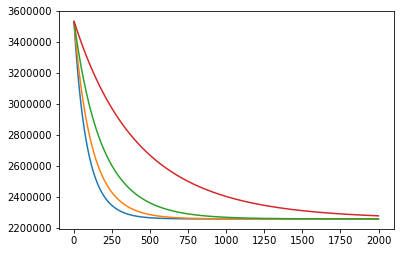

In [15]:
# 5a) Funktion zur Anwendung der Update-Rule
def compute_new_theta(x, y, thetas, alpha):
    m = len(y)
    return thetas - alpha * 1 / m * ((np.dot(thetas[1:].transpose(), x) - y) * x).sum()

alpha = np.linspace(0.005, 0.001, 4)
print("Alpha:", alpha)
iterations = 2000

# 5b) Gradientenabstiegsverfahren für n * alpha
def gradient_descent(alpha, thetas, iterations, x, y):
    costs = np.zeros([len(alpha), iterations])
    for a in range(len(alpha)):
        thetas_new = thetas
        for i in range(0, iterations):
            #print(a, ":", thetas_new)
            thetas_new = compute_new_theta(X, Y, thetas_new, alpha[a])
            costs[a][i] = j(thetas_new)
                 
    return costs, thetas_new

costs, thetas = gradient_descent(alpha,thetas,iterations, X, Y)
for i, c in enumerate(costs):
    mp.plot(costs[i])


** 6) Stellen Sie die gefundene Hyperebene in einem 3D Plot zusammen mit den Daten dar**

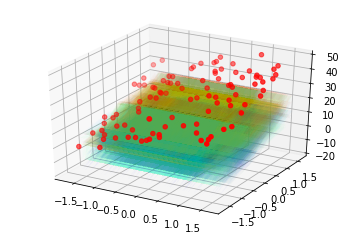

In [479]:
h_res = linear_hypothesis(thetas)
y_res = h_res(X)
# 3D-Plot
x, y = np.meshgrid(X[0], X[1])

fig=plt.figure()
ax=fig.gca(projection='3d')
ax.scatter(X[0], X[1], Y, c="r")
ax.plot_surface(y, x, y_res, cmap=cm.jet, alpha=0.01)